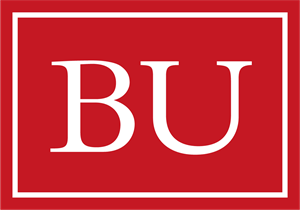

#**Assignment - 2**

---

<h2>AD699 A3 Data Mining (Spring 2024)</div>

<div style="text-align: center"> <h4>Submitted by: Aishwarya Malhotra (U17161095)</div>


# **SIMPLE LINEAR REGRESSION**

#### Solution - 1

In [ ]:
library(tidyverse)
install.packages("visualize")
library(visualize)
install.packages("AER")
library(AER)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘minqa’, ‘nloptr’, ‘Rcpp’, ‘RcppEigen’, ‘pbkrtest’, ‘lme4’, ‘car’


Loading required package: car

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some


Loading required package: lmtest

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: sandwich

Loading required package: survival



In [ ]:
install.packages("forecast")
library(forecast)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘timeDate’, ‘tseries’, ‘urca’, ‘RcppArmadillo’


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



#### Solution - 2 a]

In [ ]:
data("CreditCard")
?CreditCard
str(CreditCard)


'data.frame':	1319 obs. of  12 variables:
 $ card       : Factor w/ 2 levels "no","yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ reports    : num  0 0 0 0 0 0 0 0 0 0 ...
 $ age        : num  37.7 33.2 33.7 30.5 32.2 ...
 $ income     : num  4.52 2.42 4.5 2.54 9.79 ...
 $ share      : num  0.03327 0.00522 0.00416 0.06521 0.06705 ...
 $ expenditure: num  124.98 9.85 15 137.87 546.5 ...
 $ owner      : Factor w/ 2 levels "no","yes": 2 1 2 1 2 1 1 2 2 1 ...
 $ selfemp    : Factor w/ 2 levels "no","yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ dependents : num  3 3 4 0 2 0 2 0 0 0 ...
 $ months     : num  54 34 58 25 64 54 7 77 97 65 ...
 $ majorcards : num  1 1 1 1 1 1 1 1 1 1 ...
 $ active     : num  12 13 5 7 5 1 5 3 6 18 ...


In [ ]:
glimpse(CreditCard)

Rows: 1,319
Columns: 12
$ card        <fct> yes, yes, yes, yes, yes, yes, yes, yes, yes, yes, yes, no,…
$ reports     <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 3…
$ age         <dbl> 37.66667, 33.25000, 33.66667, 30.50000, 32.16667, 23.25000…
$ income      <dbl> 4.5200, 2.4200, 4.5000, 2.5400, 9.7867, 2.5000, 3.9600, 2.…
$ share       <dbl> 0.0332699100, 0.0052169420, 0.0041555560, 0.0652137800, 0.…
$ expenditure <dbl> 124.983300, 9.854167, 15.000000, 137.869200, 546.503300, 9…
$ owner       <fct> yes, no, yes, no, yes, no, no, yes, yes, no, yes, yes, yes…
$ selfemp     <fct> no, no, no, no, no, no, no, no, no, no, no, no, no, no, no…
$ dependents  <dbl> 3, 3, 4, 0, 2, 0, 2, 0, 0, 0, 1, 2, 1, 0, 2, 1, 2, 2, 0, 0…
$ months      <dbl> 54, 34, 58, 25, 64, 54, 7, 77, 97, 65, 24, 36, 42, 26, 120…
$ majorcards  <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1…
$ active      <dbl> 12, 13, 5, 7, 5, 1, 5, 3, 6, 18, 20, 0, 12, 3, 5, 22, 0, 8…


> **💡Interpretation of Results💡-**
>
> **Numeric - Discrete:**
> reports,
> dependents,
> months,
> majorcards,
> active,
> age.
>
>**Numeric - Continuous:**
>income,
>share,
>expenditure.
>
>**Categorical:**
>card,
>owner,
>selfemp.


#### Solution - 3

In [ ]:
set.seed(1131)

In [ ]:
#Partitioning 60% into training and validation (40%)
n <- nrow(CreditCard)
train_data <- (0.6*n)
train_index <- sample(1:n, train_data
                      )
train <- CreditCard[train_index, ]
valid <- CreditCard[-train_index, ]


> **💡Interpretation of Results💡-**
>
> a] Partitioning data into training and validation sets is crutial because
> 1.  You can then train your model on one subset (training set) and evaluate its performance on another subset (validation set).
>
> 2.  Prevent overfitting which occurs when a model learns the training data too well, capturing noise and irrelevant patterns.
>
> 3.  Partitioning the data allows you to assess the performance of different models.
>
> 4.   Unbiased Evaluation - if you evaluate the model in the same data used for training you risk obtaining overly optimistic performance estimates.
>
> 5.  Mixing training data and validation data can lead to data leakage.

#### Solution - 4

`geom_smooth()` using formula = 'y ~ x'


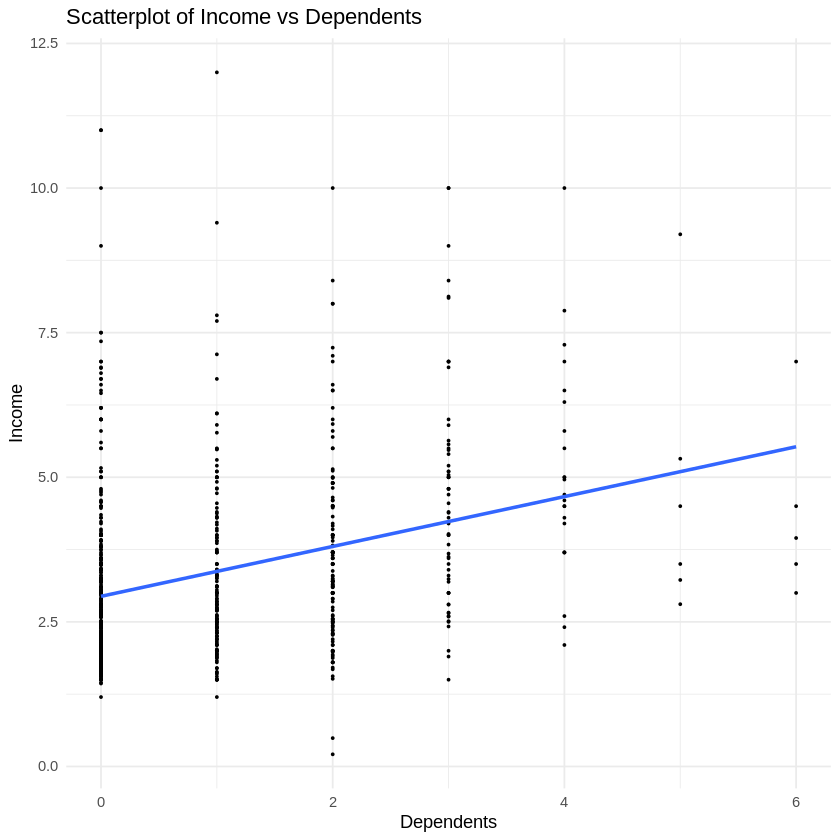

In [ ]:
##Create a scatter plot using training set
ggplot(train, aes(x = dependents, y = income)) + geom_point(size = 0.4) +
geom_smooth(method = 'lm', se = FALSE) +
labs(x = "Dependents", y = "Income") +
ggtitle("Scatterplot of Income vs Dependents") +
theme_minimal()

> **💡Interpretation of Graph💡-**
>
>The scatterplot suggests a positive correlation between income and dependents. This means that there is a general tendancy for people with more dependents to have higher incomes. The solid line is a linear regression model fit to the data points. It representsthe overall trend of increasing income with an increasing number of dependents.
>
>The data used to create this graph is only a subset (training set) of credit card customer data. The overall picture might be slightly differnent if we consider the entire dataset.

#### Solution - 5

In [43]:
cor.test(train$dependents, train$income)

[1] 0.3248254

[1] 791


	Pearson's product-moment correlation

data:  train$dependents and train$income
t = 9.6472, df = 789, p-value < 0.00000000000000022
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.2610282 0.3857975
sample estimates:
      cor 
0.3248254 


> **💡Interpretation of Results💡-**
>
>**Pearson's correlation = 0.324825418884784**
>
>This value indictes a weak positive correlation. Possitive correlation means that as the number of dependents increases, the income trends to increase as well. However, it is at the lowest end of positive correlation spectrum.

#### Solution - 6

In [ ]:
reg <- lm(income ~ dependents, data=train)
summary(reg)


Call:
lm(formula = income ~ dependents, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5937 -0.9656 -0.3617  0.5618  8.6272 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.94167    0.06991  42.077   <2e-16 ***
dependents   0.43100    0.04468   9.647   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.548 on 789 degrees of freedom
Multiple R-squared:  0.1055,	Adjusted R-squared:  0.1044 
F-statistic: 93.07 on 1 and 789 DF,  p-value: < 2.2e-16


> **💡Interpretation of Results💡-**
>
>The linear regression model shows a statistically significant positive relationship between the number of dependents and income in the training data.
>
>For every additional dependent, the model predicts an average increase of $0.43 in the incoeme.
>
>**Intercept-**  2.94167 represents the predicted average income whenn the number of dependent is zero.
>
>**t-value-** The high t-value along with a low p-value indicates that the coefficent is statistically significant.
>
>**p-value-** Both the intercept and dependent have p-values much lower than 0.05, indicating that they ar statistically significant.
>
>**Multiple R-squared-** 0.1055 It is relatively low (10.5%), indicating that the number of dependents alone doesn't explain a large portion of the variation in income.

#### Solution - 7

 > **💡Minimum and Maximum Residual Values💡-**
>
> Minimum: -3.5937; Maximum: 8.6272.

#### Solution - 7 a]

In [ ]:
sd(reg$residuals)
## Residuals of errors is essentially standard deviation of residuals but their is an adjustment made beofre the degrees of freedom.
squares <- reg$residuals^2
sumsquares <- sum(squares)
tempval <- sumsquares/789
sqrt(tempval)

#Observation that generated highest residual value in my model
max_residual <- which.max(reg$residuals)

#Person's actual income
actual_inc <- train$income[max_residual]

#Person's predicted income
predicted_inc <- predict(reg)[max_residual]

cat("Actual Income:", actual_inc,"\n")
cat("Predicted Income:", predicted_inc,"\n")


#Residual calculated
residual = actual_inc - predicted_inc
cat("Residual Calculated:", residual,"\n")

[1] 1.547282

[1] 1.548262

Actual Income: 11.9999 
Predicted Income: 3.372662 
Residual Calculated: 8.627238 


 > **💡Highest Residual Values💡-**
>
> **Residual = Actual Income - Predicted Income**
>
> **Actual Income -** 11.9999
>
>**Predicted Income -** 3.372662
>
>**Residual -** 8.627238
>
>The high residual value signifies a significant difference between the actual income and the model's prediction based on the number of dependents.

#### Solution - 7 b]

In [44]:
#Observation that generated lowest residual value in my model
low_residual <- which.min(reg$residuals)

#Person's actual income
actual_inc2 <- train$income[low_residual]

#Person's predicted income
predicted_inc2 <- predict(reg)[low_residual]

cat("Actual Income:", actual_inc2,"\n")
cat("Predicted Income:", predicted_inc2,"\n")

#Residual calculated
residual2 = actual_inc2 - predicted_inc2
cat("Residual Calculated:", residual2,"\n")

Actual Income: 0.21 
Predicted Income: 3.803657 
Residual Calculated: -3.593657 


> **💡Lowest Residual Values💡-**
>
> **Residual = Actual Income - Predicted Income**
>
> **Actual Income -** 0.21
>
>**Predicted Income -** 3.372662
>
>**Residual -** -3.593657
>
>This observation has large negative residual. The model significantly overestimated the actual income for this person.

> **💡Interpretations💡-**
>
>  While the number of dependents can influence the financial burder of an individual, it doesn't necessarily reflect their income source. Some with high number of dependents could have a high income source for their family, or they could have a low income if they are financially supported by others.
>
> Dual Income Households  - In household with two income earners, the presence of dependents might be offset by the combined income. The model wouldn't account that.
>
> The model doesn't consider individual's circuimstances.

#### Solution - 8

 > **💡Interpretation 💡-**
>
> Income = 2.94167 + 0.43100 * Dependents
>
> If we have a person with 5 dependents
>
> Income = 2.94167 + 0.43100 * 5
> Income = 5.09667
>
>Therefore, if a person has 5 dependents, the predicted income would be approximately 5.09667

#### Solution - 9

In [46]:
accuracy_train <- accuracy(reg$fitted.values, train$income)
valid_pred <- predict(reg, valid)
accuracy_valid <- accuracy(valid_pred, valid$income)
accuracy_train
accuracy_valid

,ME,RMSE,MAE,MPE,MAPE
Test set,-0.00000000000000005366143,1.546303,1.109925,-19.51991,38.46774


,ME,RMSE,MAE,MPE,MAPE
Test set,-0.01167062,1.690538,1.168727,-18.91742,37.52719


> **💡Interpretation of Results💡-**
>
>  Evaluating the model accuracy on both trainig and validation sets is crucial to ensure it's not overfitted to the training data. Iverfitting occurs when a model captures noise and patterns specific to the training data but fails to generalizre to new, unseen data. Thus, comparing performance on both sets reveal how well this model might perform on future data.
>
>RMSE- Measures the average magnitude of the residuals, giving more weight to larger residuals. A lower RMSE indicates better model.
>
> MAE- Measures the average absolute difference between predicted and actual values, treating all errors equally. A lower MAE also indicates better accuracy
>
> The model performs slightly better on the training set than on  the validation set, in terms of RMSE. This suggests minor degree of overfitting.


#### Solution - 10

In [47]:
sd_income <- sd(train$income)
sd_income

[1] 1.635995

> **💡Interpretation of Results💡-**
>
>  Since the RMSE (1.546303) of training set is smaller than the standard deviation of incomes (1.63599505563404), it indicates that the model's predictions are more accurate on avaerage than simply predicting the mean income. This suggests tahgt model is able to capture a significant portion of variability.

# **MULTIPLE LINEAR REGRESSION**

#### Solution - 1

In [ ]:
##Solution - 1
#Build Correlation Matrix
correlation_matrix <- cor(train[, sapply(train, is.numeric)])
correlation_matrix

#Elimination
options(scipen=999)
model <- lm(income ~.-share, data=train)
summary(model)

,reports,age,income,share,expenditure,dependents,months,majorcards,active
reports,1.0000000000,0.05568988,-0.01674041,-0.18789264,-0.16306114,0.0003845016,0.04737081,-0.02236278,0.22949044
age,0.0556898797,1.00000000,0.30389108,-0.13514291,-0.02078552,0.2317672786,0.47327498,-0.01163110,0.13199335
income,-0.0167404069,0.30389108,1.00000000,-0.06950165,0.24827546,0.3248254189,0.14082672,0.12373557,0.13596224
share,-0.1878926428,-0.13514291,-0.06950165,1.00000000,0.86279848,-0.0555907240,-0.05006082,0.06125682,-0.02130137
expenditure,-0.1630611388,-0.02078552,0.24827546,0.86279848,1.00000000,0.0899594294,-0.01140187,0.10165290,0.05689047
dependents,0.0003845016,0.23176728,0.32482542,-0.05559072,0.08995943,1.0000000000,0.02993334,0.00200216,0.11339020
months,0.0473708128,0.47327498,0.14082672,-0.05006082,-0.01140187,0.0299333425,1.00000000,-0.03645739,0.07962891
majorcards,-0.0223627815,-0.01163110,0.12373557,0.06125682,0.10165290,0.0020021601,-0.03645739,1.00000000,0.11667129
active,0.2294904350,0.13199335,0.13596224,-0.02130137,0.05689047,0.1133902015,0.07962891,0.11667129,1.00000000



Call:
lm(formula = income ~ . - share, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.9827 -0.8636 -0.2547  0.5262  8.3111 

Coefficients:
               Estimate  Std. Error t value       Pr(>|t|)    
(Intercept)  1.23493520  0.23239933   5.314 0.000000140192 ***
cardyes     -0.10539675  0.15071705  -0.699       0.484572    
reports      0.00013116  0.04122064   0.003       0.997462    
age          0.03224385  0.00600996   5.365 0.000000106751 ***
expenditure  0.00155478  0.00024640   6.310 0.000000000467 ***
owneryes     0.46060081  0.11859251   3.884       0.000112 ***
selfempyes   0.68745768  0.20260684   3.393       0.000726 ***
dependents   0.26598459  0.04471437   5.949 0.000000004083 ***
months      -0.00001312  0.00086747  -0.015       0.987938    
majorcards   0.38422414  0.13173429   2.917       0.003640 ** 
active       0.00665486  0.00888706   0.749       0.454188    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual stan

> **💡Interpretations💡-**
>
> Income and Age: There is a moderate positive correlation between income and age (0.30389108). This suggests that the older individuals tend to have more income.
>
> Expenditure and Share: There is a strong positive correlation between expenditure and share (0.86279848). This suggests that individuals who spent more also tend to have a higher share value, indicating a higher percentage of credit card limit used.
>
> Income and Dependents: There is a moderate positive correlation between income and dependents (0.32482542). This suggests that individuals with higher incomes may tend to have more dependents.
>
> Age and Months: There is a moderate positive correlation between age and months(0.47327498). Older individuals have had their credit card for longer period for obvious reasons.
>
> Expenditure and Income: There is a moderate positive correlation between expenditure and income (0.24827546). Higher income individuals tend to spend more.
>
>**ELIMINATION OF A VARIABLE**
>
> The strong positive correlation between expenditure and share (0.86279848) indicates potential multicollinearity. In this case, have to remove one of these variables from the model to address. The share varibale seems to be best option to remove as expenditure directly represents the amount of money spent by an individual, which is highly relevant in predicting income.

#### Solution - 2

> **💡Dummy variables💡-**
>
> Dummy variable or binary variables, are categorical variables represented as binary (0 or 1) values. These binary variable indicate the presence or absence of a particular category for each observation. The purpose of dummy variable is to enable the inclusion of categorical data in regression models, which typically require numerical inputs, by allowing for the representation of categorical information as binary values. This allows the model to account for the categorical variable's effect on the outcome variable

#### Solution - 3

In [ ]:
#Perform backward elimination
backward_model <- step(model, direction = 'backward')
summary(backward_model)

Start:  AIC=568.97
income ~ (card + reports + age + share + expenditure + owner + 
    selfemp + dependents + months + majorcards + active) - share

              Df Sum of Sq    RSS    AIC
- reports      1     0.000 1579.4 566.97
- months       1     0.000 1579.4 566.97
- card         1     0.990 1580.4 567.46
- active       1     1.135 1580.5 567.54
<none>                     1579.4 568.97
- majorcards   1    17.225 1596.6 575.55
- selfemp      1    23.312 1602.7 578.56
- owner        1    30.544 1609.9 582.12
- age          1    58.283 1637.7 595.63
- dependents   1    71.649 1651.0 602.06
- expenditure  1    80.623 1660.0 606.35

Step:  AIC=566.97
income ~ card + age + expenditure + owner + selfemp + dependents + 
    months + majorcards + active

              Df Sum of Sq    RSS    AIC
- months       1     0.000 1579.4 564.97
- active       1     1.251 1580.6 565.60
- card         1     1.276 1580.7 565.61
<none>                     1579.4 566.97
- majorcards   1    17.225 1596.6


Call:
lm(formula = income ~ age + expenditure + owner + selfemp + dependents + 
    majorcards, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.0708 -0.8555 -0.2697  0.5345  8.2402 

Coefficients:
             Estimate Std. Error t value        Pr(>|t|)    
(Intercept) 1.1945479  0.2073959   5.760 0.0000000120964 ***
age         0.0324940  0.0054107   6.005 0.0000000029172 ***
expenditure 0.0014773  0.0002232   6.618 0.0000000000676 ***
owneryes    0.4654946  0.1144779   4.066 0.0000526014292 ***
selfempyes  0.6965240  0.2014917   3.457        0.000576 ***
dependents  0.2710680  0.0439150   6.173 0.0000000010771 ***
majorcards  0.3895223  0.1304586   2.986        0.002916 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.42 on 784 degrees of freedom
Multiple R-squared:  0.2519,	Adjusted R-squared:  0.2462 
F-statistic: 43.99 on 6 and 784 DF,  p-value: < 0.00000000000000022


> **💡Interpresentaiton of Results💡-**
>
> The model suggests that age, expenditure, ownership status and number of dependents are significant predictors of  income, while the significance of having major credit cards is somewhat marginal.

#### Solution - 4

In [ ]:
residuals <- backward_model$residuals
fitted_values <- predict(backward_model)
mean_income <- mean(train$income)

In [ ]:
##Calculate SST
SST <- sum((train$income - mean_income)^2)
cat("Total Sum of Squares (SST):", SST, "\n")

##Calculate SSR
SSR <- sum((fitted_values - mean_income)^2)
cat("Total Sum of Squares due to Regression (SSR):", SSR, "\n")

## Calculate SSR/SST
ssr_sst_ratio <- SSR / SST
cat("SSR / SST Ratio:", ssr_sst_ratio, "\n")

Total Sum of Squares (SST): 2114.419 
Total Sum of Squares due to Regression (SSR): 532.5717 
SSR / SST Ratio: 0.2518761 


> **💡Interpresentaiton of Results💡-**
>
> We can see ratio of SSR and SST in the summary of the regression model under - **Multiple R- Squared**.
>
> The ratio indicate that approximately  25.8% of the total variability in income is explained by the predictors (age, expenditure, owner, dependents and majorcards) included in the regression model. The model accounts for 25.8% of variation in the income.

#### Solution - 5

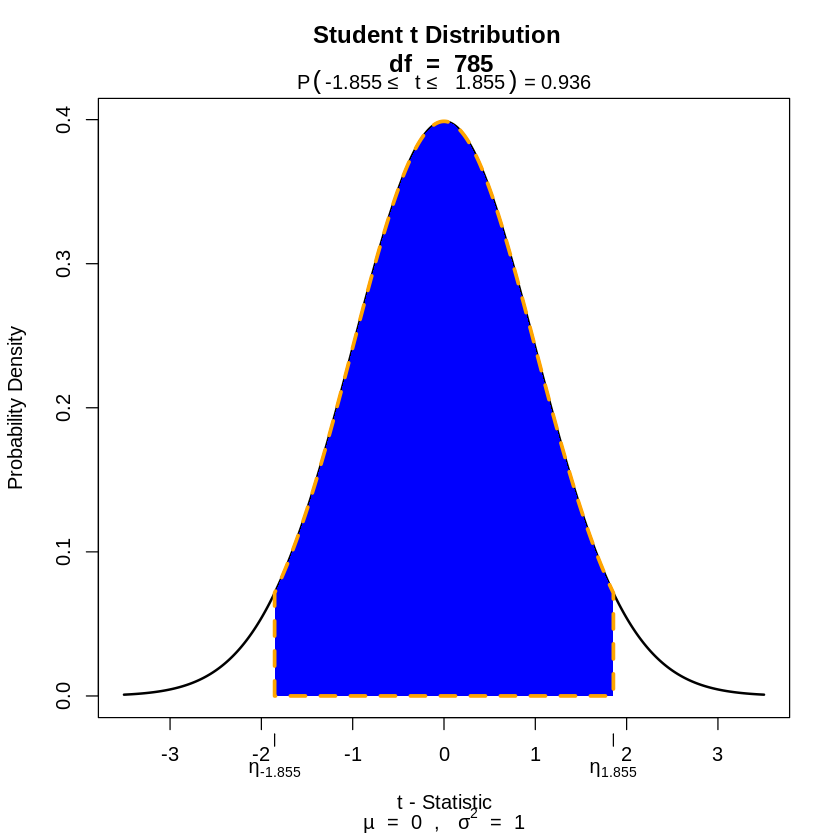

In [ ]:
visualize.t(stat = c(-1.855,1.855), df=785, section = 'bounded')

> **💡Interpretation of Graph💡-**
>
> The shaded area under t-distribution plot represents the p-value associated with the t-value of -1.855 for the predictor "majorcards".
>
>In this case, the shaded area represents approximately 93.6% of the curvve, indicating a high p value. The high p value suggests that there is not enough evidence to reject the null hypothesis for the predictor "majorcards". This means that majorcards is not statistically significant in predicting the outcome variable "income" in the regression model.
>
> Any point underneath that  curve, which encompasses approximately 93.6% of the total area,represents the probability of observing the t-value as extreme as -1.855 or more extreme under the null hypothesis.

#### Solution - 6

In [53]:
#Model's F-statistic: 54.52
#It is calculated by using below mentioned formula
#Calculate RSS
RSS <-  sum(residuals^2)
cat("Residual Sum of Squares (RSS):", RSS, "\n")
#Calculate number of predictors
p <-  length(coefficients(backward_model)) - 1
#Calculate the number of observations
n <- length(train$income)

#F - statistics
F_statistics <- ((SST - RSS)/p)/ (RSS/ (n-p-1))
cat("F-statisctics:", F_statistics, "\n")


Residual Sum of Squares (RSS): 1581.847 
F-statisctics: 37.65973 


In [54]:
RSS <- sum(residuals^2)
cat("Residual Sum of Squares (RSS):", RSS, "\n")
#Calculate number of predictors
p <- length(coefficients(backward_model)) - 1
#Calculate the number of observations
n <- length(train$income)

# F-statistics
F_statistics <- ((SST - RSS)/p)/ (RSS/ (n-p-1))


Residual Sum of Squares (RSS): 1581.847 


> **💡Interpretation of Results💡-**
>
> **Please note there is some error in the software I will share my R code where you will see correct answer represented**
>
>The F-statistic, in the context of linear regression, is a statistical test that measures the overall significance of the model. It compares the explained variance by the model to the unexplained variance (residuals).

#### Solution - 7

In [55]:
#Fictional consumer = Ash
Ash <- data.frame(
  age = 28,
  expenditure = 500,
  owner = "no",
  dependents = 0,
  majorcards = 2,
  selfemp = "no"
)

#Predicted income
predicted_income_Ash <- predict(backward_model, newdata = Ash)
cat("Ash's predicted income:", predicted_income_Ash)

Ash's predicted income: 3.622098

> **💡Interpretation of Code & Graph💡-**
>
>Ash, is a 28-year-old individual with no dependents, who does not own a property and has two major credit cards. Based on the multiple linear regression model, Ash's predicted income is approximately $3.622098. This prediction is made using Ash's attributes as input into the model, which considers factors such as age, expenditure, ownership status, dependents, and the number of major credit cards owned.

#### Solution - 8

In [ ]:
#Accuracy on Training set
accuracy_train1 <- accuracy(backward_model$fitted.values, train$income)

#Accuracy on training set
print (accuracy_train1)

valid_pred2 <- predict(backward_model, valid)
accuracy_valid2 <- accuracy(valid_pred2, valid$income)

#Accuracy on valid set
print (accuracy_valid2)

                                 ME     RMSE       MAE       MPE     MAPE
Test set -0.00000000000000001637132 1.414145 0.9999472 -16.46599 34.67075
                  ME     RMSE      MAE       MPE     MAPE
Test set -0.05661863 1.494325 1.056578 -16.92579 34.24123


> **💡Interpretation of Code & Graph💡-**
>
> The MLR model does not seem to offer a significant improvement in predictive accuracy compared to the SLR model, as both models exhibit similar performance on both the training and validation sets. This suggests that the additional predictors included in the MLR model may not be contributing significantly to improving the accuracy of income prediction compared to the single predictor used in the SLR model.
>
>Limitations of Predicting Income with Available Variables:
>
>Acknowledge that income is complex and influenced by various factors.
>Identify variables that might be missing or difficult to capture (e.g., job satisfaction, health status, unexpected financial events).
>
>It's important to note that accuracy metrics alone may not fully capture the performance of the models, and further analysis such as residual analysis and model diagnostics may be necessary to understand the differences between the models more comprehensively. Additionally, considering other evaluation metrics or techniques could provide additional insights into the models' performance and potential limitations.